In [1]:
import numpy as np
from numpy import linalg as LA
from scipy import misc

import torch

import matplotlib.pyplot as plt
%matplotlib inline

# Homework 0

## Problem 1

1. Gradient of Lagrangian

(your work here)

2. Unconstrained least square

(your work here)

3.a

(your work here)

3.b

(your work here)

4. Implement

In [7]:
def newtonsMethod(f, x0, tol=1.48e-08, max_iter=100):
    x = x0
    for itr in range(max_iter):
        df = misc.derivative(f, x, dx=1e-6)
        x1 = x - f(x)/df
        if abs(x1 - x) < tol:
            print(f"the root was found to be at{x1} after {itr} iterations")
            return x1
        x = x1
    print("Maximum number of iterations exceeded")
    return x

In [8]:

def solve(A, b, eps):
    # your implementation here
    I = np.eye(A.shape[1])
    h = lambda l: LA.inv(A.T @ A + 2 * l *I) @ A.T @ b
    f = lambda l: h(l).T @ h(l) - eps
    
    l0=0
    l = newtonsMethod(f, l0)
    return h(l)

In [9]:
npz = np.load('./data/HW0_P1.npz')
A = npz['A']
b = npz['b']
eps = npz['eps']
A.shape, A.dtype, b.shape, b.dtype 

((100, 30), dtype('float64'), (100,), dtype('float64'))

In [11]:
# Evaluation code, you need to run it, but do not modify
x = solve(A,b,eps)
print('x norm square', x.T@x)  # x@x should be close to or less then eps
print('optimal value', ((A@x - b)**2).sum())

the root was found to be at0.8370457568470628 after 4 iterations
x norm square 0.5
optimal value 17.22012713194459


## Problem 2

(2.1) Your proof here

(2.2) Your proof here

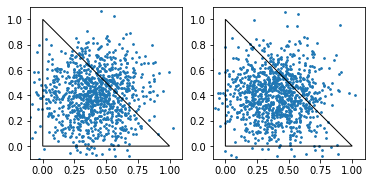

In [4]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

pts = np.array([[0,0], [0,1], [1,0]])
def draw_background(index):
    # DRAW THE TRIANGLE AS BACKGROUND
    p = Polygon(pts, closed=True, facecolor=(1,1,1,0), edgecolor=(0, 0, 0))

    plt.subplot(1, 2, index + 1)

    ax = plt.gca()
    ax.set_aspect('equal')
    ax.add_patch(p)
    ax.set_xlim(-0.1,1.1)
    ax.set_ylim(-0.1,1.1)

# YOUR CODE HERE

draw_background(0)
# REPLACE THE FOLLOWING LINE USING YOUR DATA (incorrect method)
plt.scatter(0.4+0.2*np.random.randn(1000), 0.4+0.2*np.random.randn(1000), s=3) 

draw_background(1)
# REPLACE THE FOLLOWING LINE USING YOUR DATA (correct method)
plt.scatter(0.4+0.2*np.random.randn(1000), 0.4+0.2*np.random.randn(1000), s=3) 

plt.show()

## Problem 3

In [2]:
train_npz = np.load("./data/train.npz")
images = train_npz["images"]  # array with shape (N,Width,Height,3)
edges = train_npz["edges"]  # array with shape (N,Width,Height)

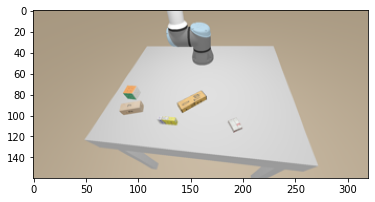

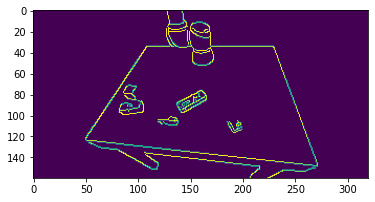

In [3]:
plt.figure()
plt.imshow(images[0])
plt.figure()
plt.imshow(edges[0])
plt.show()

In [4]:
images.shape, edges.shape, images.max(), np.unique(edges)

((1000, 160, 320, 3), (1000, 160, 320), 255, array([  0, 255], dtype=uint8))

In [5]:
def predict(model, test_images, device):
    
    plt.figure(figsize=(10, 10))
    
    x = np.moveaxis(test_images, -1, 1)
    x = torch.from_numpy(x).float().to(device)
    preds = torch.sigmoid(model(x))
    preds = (preds > 0.5).squeeze(1).float().cpu().numpy()
    return preds

    # for i in range(len(test_images)):
    #     plt.subplot(4, 2, i * 2 + 1)
    #     plt.imshow(test_images[i])
    #     plt.subplot(4, 2, i * 2 + 2)
    #     plt.imshow(preds[i])
    # plt.savefig(save_dir)

=> Loading checkpoint


<Figure size 720x720 with 0 Axes>

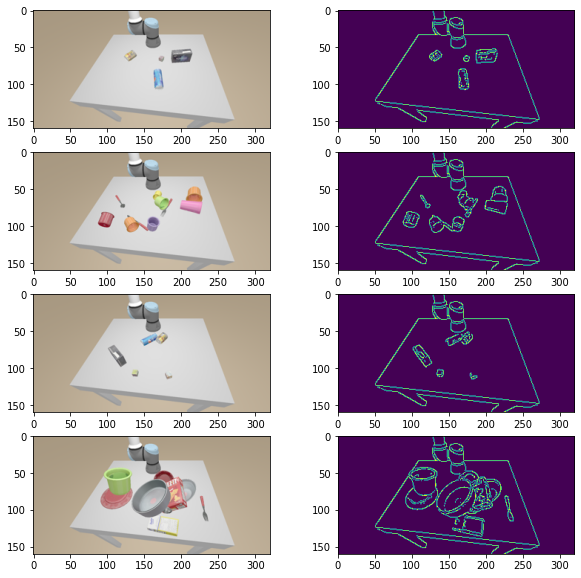

In [7]:
from cse291.HW0.Unet_model import UNET
from cse291.HW0.pipline import load_checkpoint

# Test on the testing set
test_npz = np.load("./data/test.npz")
test_images = test_npz["images"]

device = "cuda" if torch.cuda.is_available() else "cpu"
model = UNET(in_channels=3, out_channels=1).to(device)
load_checkpoint(torch.load("my_checkpoint.pth"), model)

edge = predict(model, test_images, device)

plt.figure(figsize=(10, 10))
for i, img in enumerate(test_images[:4]):
    plt.subplot(4, 2, i * 2 + 1)
    plt.imshow(img)
    
    plt.subplot(4, 2, i * 2 + 2)
    plt.imshow(edge[i])
plt.show()